In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
!git config --global user.name "Sakshi101214"
!git config --global user.email "22f3002973@ds.study.iitm.ac.in"


In [4]:
!git clone https://github.com/Sakshi101214/MLT.git


Cloning into 'MLT'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), 38.75 KiB | 19.37 MiB/s, done.


In [6]:
!mv /https://colab.research.google.com/drive/13ygeSW_Id-6WIpJ6rdyNTo5TC1vM7Sbp?usp=drive_link MLT/  # Replace with your notebook path


mv: cannot stat '/https://colab.research.google.com/drive/13ygeSW_Id-6WIpJ6rdyNTo5TC1vM7Sbp?usp=drive_link': No such file or directory


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Week-2

**Note to Learners**:

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

In [ ]:
# Enter your solution here
make_circles?
#h range(160,180)
#w range(45,70)
#data point (h,w)
# 0->age<18
# 1->age>18
#from matplotlib.colors import ListedColormap

In [ ]:
X.shape
#y=[0,1,1,0,1,0]
#[0,1,2,3,4,5]

(1000, 2)

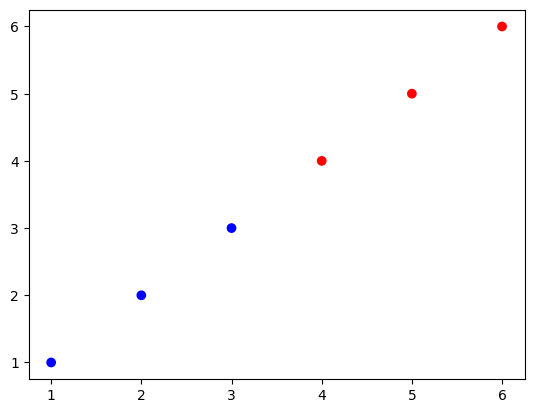

In [ ]:
a=np.array([[1,2,3,4,5,6],[1,2,3,4,5,6]])
l=np.array([0,0,0,1,1,1])
plt.scatter(a[0],a[1],c=l,cmap=ListedColormap(["blue","red"]))

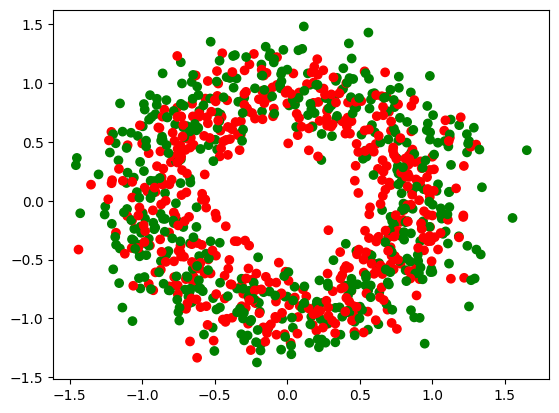

In [ ]:
plt.scatter( X[:,0] , X[:,1] , c=y, cmap=ListedColormap(["green","red"]) )

## Problem 2
How many samples are there in the dataset?


In [ ]:

# Enter your solution here
X.shape
#d,n

(1000, 2)

## Problem 3
How many features are there in the dataset?

In [ ]:
# Enter your solution here
X.shape

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here
k=lambda x,y: (x@y+1)**2

In [ ]:
#K->nxn matrix
K=np.zeros(shape=(1000,1000))
s1=0
for i in range(1000):
  for j in range(1000):
    #Kij=k(x_i,x_j)
    K[i,j]=k(X[i],X[j])
    s1=s1+(K[i,j]**2)
s1=np.sqrt(s1)
s1=s1/1000
s1

2.096195646589976

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [ ]:
# Enter your solution here

def gk(x,y,s):
  num=-(np.linalg.norm(x-y)**2)
  den=2*(s**2)
  return np.exp(num/den)

In [ ]:
GK=np.zeros(shape=(1000,1000))
s2=0
for i in range(1000):
  for j in range(1000):
    #GKij=gk(x_i,x_j)
    s=2
    GK[i,j]=gk(X[i],X[j],s)
    s2=s2+(GK[i,j]**2)
s2=np.sqrt(s2)
s2=s2/1000
s2

0.8079400085319918

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [ ]:
# Enter your solution here
I=np.ones(shape=(1000,1000))/1000
KC=K-I@K-K@I+I@K@I
s3=0
for i in range(1000):
  for j in range(1000):
    s3=s3+(KC[i,j]**2)
s3=np.sqrt(s3)
s3=s3/1000
s3

1.451798517697666

## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [ ]:
# Enter your solution here
eval,evec=np.linalg.eigh(KC)

In [ ]:
#sorted->yes
#ascending order
np.linalg.eigh?
#evec->every column is an eigenvector
#b1=evec[:,-1]

In [ ]:
a1=evec[:,-1]/np.sqrt(eval[-1])
a2=evec[:,-2]/np.sqrt(eval[-2])
pr1=KC@a1
pr2=KC@a2

In [ ]:
a=np.array([-1,-2,-3])
abs(a)

array([1, 2, 3])

In [ ]:
(1/1000)*np.sum(abs(pr1))+(1/1000)*np.sum(abs(pr2))

1.744726799095333